## Load Squidpop Data Entry Template into R

Data was entered into the MarineGEO squidpop data entry template v0.0.3. Parse the information from the seperate Excel sheets and load the data into R as separate dataframes.

In [15]:
library(tidyverse)
library(purrr)
library(knitr)
library(sf)
library(leaflet)
library(leaflet.esri)
library(htmlwidgets)
library(IRdisplay)

In [1]:
# path to the marinegeo squidpop data entry template
xlsx <- "data/Squidpops_example_BocasDelToro_2018.xlsx" 


In [5]:
# load each of the sheets from the data entry template as R dataframes
# pull the information from the metadata sheet into a dataframe 
metadata <- readxl::read_excel(xlsx, sheet = "Metadata", skip = 3, 
                               col_names = c("var", "value")) %>% 
  tidyr::spread(var, value)
# load the data from the Location sheet  
location <- readxl::read_excel(xlsx, sheet = "Location")
# load the data from the Data sheet
data <- readxl::read_excel(xlsx, sheet = "Data")

## Data Cleanup
A few columns need to be cleaned up. The read_excel() function did not parse the time fields correctly (ie ‘1899-12-31 11:40:00’) so we will need to fix it. Also, we want to calculate the percent bait lost (the number of bait missing divided by the number of stakes remaining) at each of the time checks. Finally, add the coordinates to the data using a left join.

In [7]:
# clean up the squidpop dataset by fixing the time format, calculating the percent bait lost, and joining the coordinates from the Location sheet
data_w_coords <- data %>% 
  mutate(timeDeployed=format(timeDeployed, format="%H:%M"), 
         timeCollected=format(timeCollected, format="%H:%M")) %>% # clean up hh:mm fields
  mutate(stakesRemaining1hr = numberDeployed) %>%  # stakes remaining @ 1 hr didn't get recorded 
  mutate(percentBaitLost1hr=baitMissing1hr/stakesRemaining1hr, 
         percentBaitLost24hr=baitMissing24hr/stakesRemaining24hr) %>% # calc the % of bait lost 
  dplyr::left_join(location, by=c("location"="location")) # left join to add the location info
data_w_coords

location,dateDeployed,timeDeployed,numberDeployed,baitType,stakesRemaining1hr,baitMissing1hr,dateCollected,timeCollected,stakesRemaining24hr,⋯,percentBaitLost24hr,site,locality,decimalLatitude,decimalLongitude,habitat,geoform,substrate,biotic,locationRemarks
BT-ALM-REEF8,2018-06-14,10:20,5,Squid,5,4,2018-06-15,10:20,5,⋯,1.0,BT,Almirante,9.290028,-82.34292,Reef,NA,NA,NA,NA
BT-ALM-REEF3,2018-06-14,10:10,5,Squid,5,5,2018-06-15,10:10,5,⋯,1.0,BT,Almirante,9.290028,-82.34292,Reef,NA,NA,NA,NA
BT-ALM-SEAGRASS,2018-06-14,09:50,5,Squid,5,0,2018-06-15,09:50,5,⋯,0.8,BT,Almirante,9.290889,-82.34300,Seagrass,NA,NA,NA,NA
BT-ALM-SAND,2018-06-14,09:25,5,Squid,5,0,2018-06-15,09:25,5,⋯,1.0,BT,Almirante,9.295810,-82.34579,Sand,NA,NA,NA,NA
BT-ALM-MANGROVE,2018-06-14,09:40,5,Squid,5,2,2018-06-15,09:40,5,⋯,1.0,BT,Almirante,9.295550,-82.34599,Mangrove,NA,NA,NA,NA
BT-JUAN-REEF10,2018-06-14,09:50,5,Squid,5,2,2018-06-15,09:40,5,⋯,1.0,BT,Juan Point,9.301500,-82.29404,Reef,NA,NA,NA,NA
BT-JUAN-REEF5,2018-06-14,09:56,5,Squid,5,5,2018-06-15,09:56,5,⋯,1.0,BT,Juan Point,9.301500,-82.29404,Reef,NA,NA,NA,NA
BT-JUAN-SEAGRASS,2018-06-14,10:33,5,Squid,5,0,2018-06-15,10:33,5,⋯,0.2,BT,Juan Point,9.296410,-82.29327,Seagrass,NA,NA,NA,NA
BT-JUAN-SAND,2018-06-14,11:00,5,Squid,5,2,2018-06-15,11:00,5,⋯,1.0,BT,Juan Point,9.297100,-82.29527,Sand,NA,NA,NA,NA
BT-JUAN-MANGROVE,2018-06-14,11:40,5,Squid,5,1,2018-06-15,11:40,5,⋯,0.2,BT,Juan Point,9.298200,-82.29172,Mangrove,NA,NA,NA,NA


## Map

In [18]:
# color schema for each of the habitat types as a named list
pal <- c("Reef"="#F8766D","Mangrove"="#B79F00", "Sand"="#619CFF", "Seagrass"="#00BA38", "Other"="black")
# turn the dataframe into a simple features (sf) object
data_sf <- data_w_coords %>% rowwise() %>% 
  dplyr::mutate(circle_color = pluck(pal, habitat)) %>% # add the color to the data fame
  sf::st_as_sf(coords=c("decimalLongitude", "decimalLatitude"), crs="+proj=longlat +datum=WGS84")
# create a leaflet map
map <- data_sf %>% 
  leaflet::leaflet() %>% # leaflet map
  addProviderTiles(providers$Esri.WorldImagery, options = providerTileOptions(opacity = 0.55)) %>% # adds ESRI base imagery
  addProviderTiles(providers$OpenMapSurfer.Roads, options = providerTileOptions(opacity = 0.35)) %>% # adds base layer from open map surfer
  addCircleMarkers(fillColor=~circle_color, radius=10, stroke = TRUE, fillOpacity = 1, color="black", weight=.5) %>% # add markers to the map for each deployment locations. Circle colors are symbolized by the habitat type.
  addLegend(colors=c(pal) , labels=c(names(pal)), opacity=1) # add legend to map using the color schema named list

# render html map in jupyter notebook
saveWidget(map, 'demo.html', selfcontained = FALSE)
display_html('<iframe src="demo.html" width="100%" height="600px"></iframe>')

## Summary Table - Percent consumed by Habitat Type

In [19]:
# convert the data table into a long format by grouping the percentBaitLost by hour
data_w_coords_long <- data_w_coords %>% 
  select(location, habitat, percentBaitLost1hr, percentBaitLost24hr) %>% # select the columns of interest
  gather(percentBaitLost24hr, percentBaitLost1hr, key="time", value="percentLost") %>% # gather percentBaitLost to a long format
  mutate(hours=str_extract(time, "[[:digit:]]+")) %>% # extract the number from the name (percentBaitLost24hr -> 24)
  mutate(hoursLabel = case_when(
    hours==1 ~str_c(hours, "Hour", sep=" "),
    hours>1 ~ str_c(hours, "Hours", sep=" "))) %>% # creates a grammerly correct label
  filter(!is.na(percentLost)) # removes any rows that don't contain data
#data_w_coords_long

In [20]:
# create a summary table of the average percent consumed by habitat type
data_w_coords_long %>% 
  group_by(habitat, hoursLabel) %>% # group by habitat and the amount of time
  summarize(average=paste(round(mean(percentLost*100),3), "%", sep="")) %>% # calculate the average per group
  spread(hoursLabel, average) # spreads to wide format to print to outpu

habitat,1 Hour,24 Hours
Mangrove,26.667%,73.333%
Reef,63.333%,96.667%
Sand,46.667%,100%
Seagrass,13.333%,53.333%


## Number of Deployments by Habitat Type

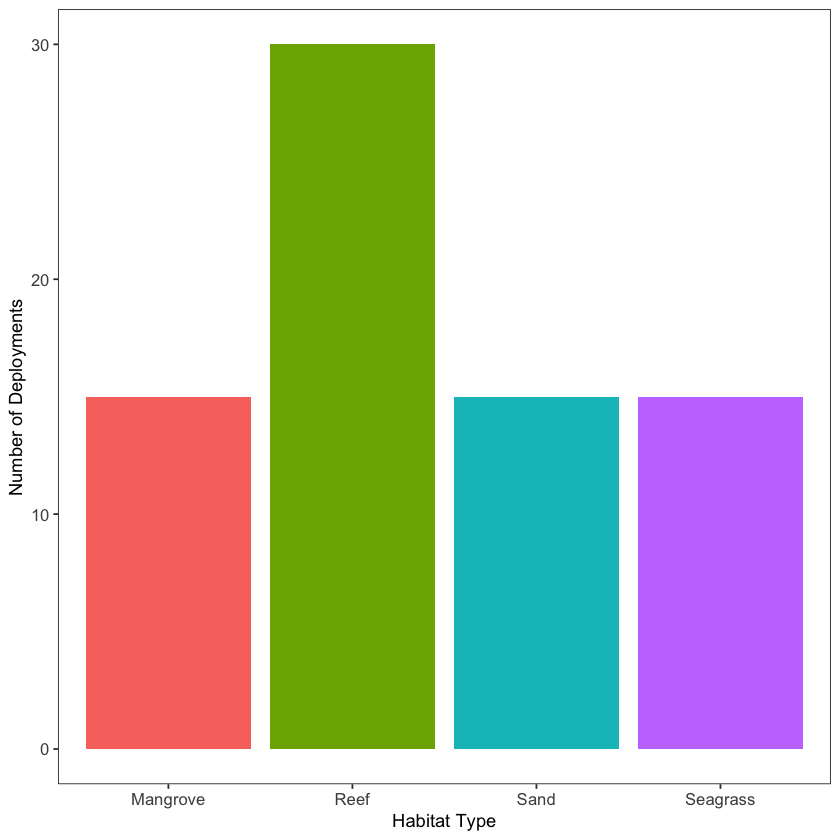

In [22]:
data_w_coords %>% 
  group_by(habitat) %>% # group by the habitats
  summarize(count=sum(numberDeployed)) %>% # count the total number of squidpops deployed per habitat group
  ggplot(aes(x=habitat, y=count, fill=habitat))+ # construct the plot using ggplot
  geom_bar(stat="identity")+ # add bars
  ylab("Number of Deployments")+ # axis label
  xlab("Habitat Type")+ # axis label
  theme_bw()+
  theme(panel.grid.major = element_blank(),
        plot.title = element_text(hjust = 0.5),
        panel.grid.minor = element_blank(),
        legend.position="none", # position of legend or none
        legend.direction="horizontal", # orientation of legend
        legend.title= element_blank(), # no title for legend
        legend.key.size = unit(1.0, "cm"),
        axis.text.x=element_text(size=10),
        axis.text.y=element_text(size=10)
        )

## Box and Whiskers Plot


List of 4
 $ panel.spacing   :Class 'unit'  atomic [1:1] 2
  .. ..- attr(*, "valid.unit")= int 3
  .. ..- attr(*, "unit")= chr "lines"
 $ strip.background: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ strip.placement : chr "outside"
 $ strip.text.y    :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 16
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : num 0
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

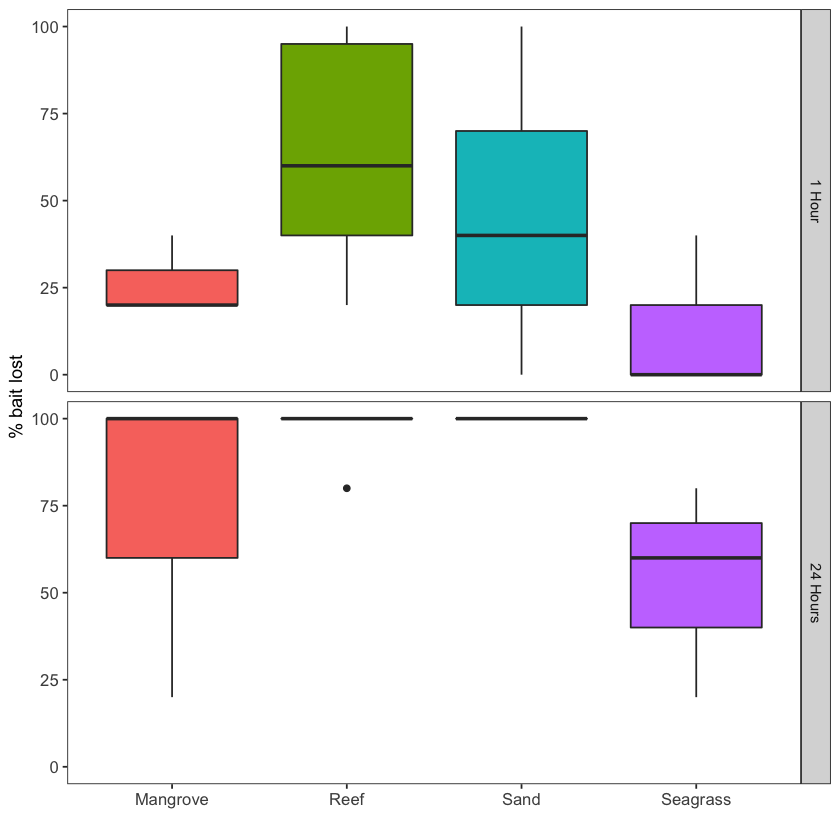

In [23]:
data_w_coords_long %>% 
  ggplot(aes(x=habitat, y=percentLost * 100, fill=habitat))+ # graph percent lost by habitat
  geom_boxplot() + # add box whisker 
  xlab("") + # axis labels
  ylab("% bait lost") + # axis labels
  facet_grid(hoursLabel ~ .) + # facet plot by elapsed time
  theme_bw()+
  theme(panel.grid.major = element_blank(),
        plot.title = element_text(hjust = 0.5),
        panel.grid.minor = element_blank(),
        legend.position="none", # position of legend or none
        legend.direction="horizontal", # orientation of legend
        legend.title= element_blank(), # no title for legend
        legend.key.size = unit(1.0, "cm"),
        axis.text.x=element_text(size=10),
        axis.text.y=element_text(size=10)
        )
  theme(strip.background = element_blank(), # removes gray box behind the facet label
        strip.placement = "outside",
        panel.spacing = unit(2, "lines"), # controls spacing between facets
        strip.text.y = element_text(size = 16, angle = 0) # facet label size
        )

## Percent Eaten by Deployment Group
